# 1st Assignment-- Moamin Abdulkareem

## Problem 1.4 Page 35


In [5]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')


100
[[-8.41443797 -1.24472894]]
1.0


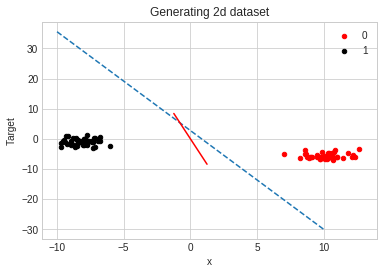

In [60]:
# Generate 2d classification dataset using make_blobs which make make the data linearly seperable
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
# scatter plot, dots colored by class value
# here the label is the vector of target 

df =pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'black'}
fig, ax = plt.subplots()


x_values = np.linspace(-10, 10, 256)
weights = np.random.randn(2,1)
# This is an equation to plot a line 
y_values = ((- weights[0] * x_values) - 1) / weights[1]
# first we plot the random line and then we plot the perceptron decision boundary

plt.plot(x_values, y_values, "--")


grouped = df.groupby('label')

# group here is the list of xs and ys that belong to a specific key
# visualizing the data points

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
#plt.xticks([i for i in range(-10,10)])
#plt.yticks([i for i in range(-10,10)])
plt.ylabel('Target')
plt.title('Generating 2d dataset')

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)
clf = Perceptron(max_iter=100)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(clf.n_iter_)
weights2 = clf.coef_
print(weights2)
ww1 = [weights2[0][1], -weights2[0][0]]
ww2 = [-weights2[0][1], weights2[0][0]]
print(np.mean(y_pred == Y_test))
plt.plot([ww1[0], ww2[0]], [ww1[1], ww2[1]],color='r',)
plt.show()

5
[[10.77245156  2.18259917]]
1.0


/home/moomen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


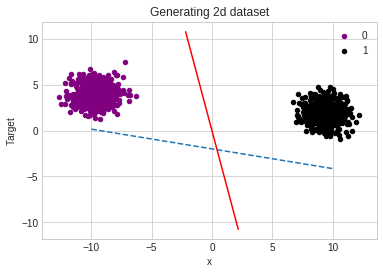

In [62]:
# Apply the perceptron learning algorithm
# Strategy: I need to apply the classifier on the dataset and then I will need the same data drawing
# from above and then I need to plot the line of perceptron which I can get from the git code. Try
# to find a way to plot both lines together based on the points in the pdf.
# Finally we continue with what he said but we will probably need plots everywhere

# Generate 2d classification dataset using make_blobs which make make the data linearly seperable
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
# scatter plot, dots colored by class value
# here the label is the vector of target 

df =pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'purple', 1:'black'}
fig, ax = plt.subplots()


x_values = np.linspace(-10, 10, 256)
weights = np.random.randn(2,1)
# This is an equation to plot a line 
y_values = ((- weights[0] * x_values) - 1) / weights[1]
# first we plot the random line and then we plot the perceptron decision boundary

plt.plot(x_values, y_values, "--")


grouped = df.groupby('label')

# group here is the list of xs and ys that belong to a specific key
# visualizing the data points

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
#plt.xticks([i for i in range(-10,10)])
#plt.yticks([i for i in range(-10,10)])
plt.ylabel('Target')
plt.title('Generating 2d dataset')

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)

clf = Perceptron()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(clf.n_iter_)
weights2 = clf.coef_
print(weights2)
ww1 = [weights2[0][1], -weights2[0][0]]
ww2 = [-weights2[0][1], weights2[0][0]]
print(np.mean(y_pred == Y_test))
plt.plot([ww1[0], ww2[0]], [ww1[1], ww2[1]],color='r',)
plt.show()

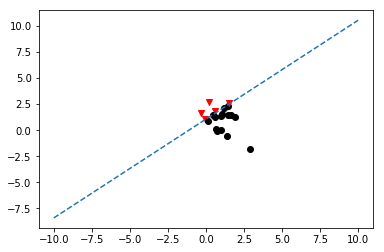

[-12.417122    13.10830479]


In [61]:
import numpy as np
import matplotlib.pyplot as plt


def plot_line(x_val, y_val, targets, points):
    fig = plt.figure()
    for i in range(points.shape[0]):
        if targets[i] == 1.0:
            plt.scatter(points[i, 0], points[i, 1], figure=fig, marker="v", c="red")
        else:
            plt.scatter(points[i, 0], points[i, 1], figure=fig, marker="o", c="black")
    plt.plot(x_val, y_val, "--", figure=fig)
    plt.show()


def activation(net_value, activation_function):
    if activation_function == 'Sigmoid':
        # =============================
        # Calculate Sigmoid Activation
        # =============================
        activation = 1.0 / (1 + np.exp(-net_value))

    elif activation_function == "Linear":
        # =============================
        # Calculate Linear Activation
        # =============================
        activation = net_value

    elif activation_function == "Symmetrical Hard limit":
        # =============================================
        # Calculate Symmetrical Hard limit Activation
        # =============================================
        if net_value.size > 1:
            activation = net_value
            activation[activation >= 0] = 1.0
            activation[activation < 0] = -1.0
        # =============================================
        # If net value is single number
        # =============================================
        elif net_value.size == 1:
            if net_value < 0:
                activation = -1.0
            else:
                activation = 1.0

    elif activation_function == "Hyperbolic Tangent":
        # =============================================
        # Calculate Hyperbolic Tangent Activation
        # =============================================
        activation = ((np.exp(net_value)) - (np.exp(-net_value))) / ((np.exp(net_value)) + (np.exp(-net_value)))

    return activation


a = 1
b = 1


def target(x):
    if x[1] > a*x[0]+b:
        return 1
    else:
        return -1


def gen_y(X_sim):
    return np.array([target(x) for x in X_sim])


def train(data_points, targets, weights):
    outer_loop = False
    error_array = np.zeros_like(targets) + 0.5
    bias = 0

    # ==========================
    # Training starts from here
    # ==========================
    for i in range(0, 1000):
        for j in range(0, data_points.shape[0]):
            # =======================
            # Getting the input point
            # =======================
            point = data_points[j, :]

            # =======================
            # Calculating net value
            # =======================
            net_value = np.sum(weights * point) + bias  # [1x2] * [2x1]

            # =======================
            # Calculating error
            # =======================
            error = targets[j] - activation(net_value, "Symmetrical Hard limit")
            error_array[j] = error

            # ============================================
            # Keeping the error in range from -700 to 700
            # this is to avoid nan or overflow error
            # ============================================
            if error > 1000 or error < -700:
                error /= 10000

            # ==========================
            # Updating Weights and bias
            # ==========================
            weights += error * point
            bias += error * 1.0  # While updating bias input is always 1

            ###########################################################
            # If you want to use unsupervised hebb rule then use the below update rule
            # weights += targets[j] * point
            # bias += targets[j] * 1.0  # While updating bias input is always 1
            ###########################################################
            # if error_array.all() == np.zeros_like(error_array).all():
            #     outer_loop = True
            #     break
        x_values = np.linspace(-10, 10, 256)

        if weights[0] == 0:
            weights[0] = 0.1

        if weights[1] == 0:
            weights[1] = 0.1

        # ========================================================
        # Getting the y values to plot a linear decision boundary
        # ========================================================
        y_values = ((- weights[0] * x_values) - bias) / weights[1]  # Equation of a line

        if outer_loop:
            break

    plot_line(x_values, y_values, targets, data_points)


def pcp(X, y):
    w = np.zeros(2)
    Z = np.hstack((X, np.array([y]).T))
    X = Z[0:, 0:2]
    Y = Z[0:, 2]
    train(X, Y, w)
    # while ~all(z[2]*np.dot(w, z[:2]) > 0 for z in Z):  # some training sample is miss-classified
    #     i = np.where(y*np.dot(w, x) < 0 for x in X)[0][0]  # update the weight based on misclassified sample
    #     print(i)
    #     w = w + y[i]*X[i]
    return w


if __name__ == '__main__':
    X = np.random.multivariate_normal([1, 1], np.diag([1, 1]), 20)
    y = gen_y(X)
    w = pcp(X, y)
    print(w)

[[ 1.4335422   2.76724738]
 [ 0.82123044  1.24139759]
 [ 0.88978821  2.26641558]
 [ 1.32272499  1.49061024]
 [-0.42205382  3.02556515]
 [ 1.12553037  1.22923035]
 [ 1.19400759  1.26424432]
 [ 1.58368504  3.30959759]
 [ 0.62710563  0.92097967]
 [-0.13241453  0.64927712]
 [ 0.70130626  2.22997423]
 [ 1.88375611 -0.67628228]
 [-0.13342352  1.93840702]
 [ 2.30173333  0.559305  ]
 [ 0.53636613  4.29184208]
 [ 0.40140219  0.08533092]
 [ 0.45444549  2.33484501]
 [ 1.21615665  1.63839035]
 [-0.258323    0.89048803]
 [ 2.51724346  0.32722574]]
[ 1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]


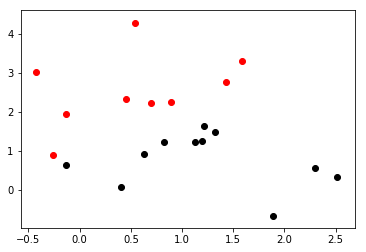

In [37]:

a = 1
b = 1


def target(x):
    if x[1] > a*x[0]+b:
        return 1
    else:
        return -1


def gen_y(X_feature):
    return np.array([target(i) for i in X_feature])

def pcp(X, y):
    w = np.zeros(2)
    Z = np.hstack((X, np.array([y]).T))
    X = Z[0:, 0:2]
    Y = Z[0:, 2]
    train(X, Y, w)
X = np.random.multivariate_normal([1, 1], np.diag([1,1]), 20)
y = gen_y(X)
print(X)
print(y)
from matplotlib import pyplot as plt
fig = plt.figure()
for i in range(X.shape[0]):
    if y[i] == 1.0:
        plt.scatter(X[i, 0], X[i, 1], figure=fig, marker="o", c="red")
    else:
        plt.scatter(X[i, 0], X[i, 1], figure=fig, marker="o", c="black")

*Bernoulli*